# Multiple Linear Regression (MLR) - Toyota Corolla Dataset

In this assignment, we analyze the Toyota Corolla dataset to predict the car price using Multiple Linear Regression. We'll perform data preprocessing, visualization, check for multicollinearity using VIF, and compare regularization techniques like Lasso and Ridge Regression.



In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm



In [9]:
# Load the dataset
df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')

# Basic info
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000 

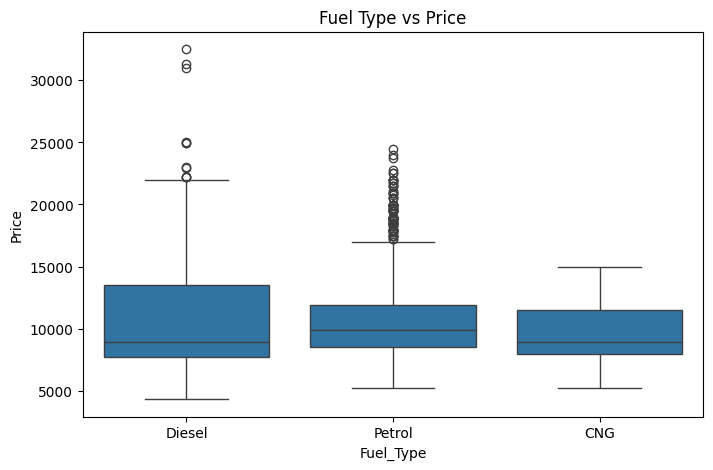

In [10]:
# Reload raw data to preserve 'Fuel_Type'
df_raw = pd.read_csv('/content/ToyotaCorolla - MLR.csv')

# Boxplot: Fuel_Type vs Price
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fuel_Type', y='Price', data=df_raw)
plt.title("Fuel Type vs Price")
plt.show()


we have the outlier in the Diesel and  petrol


In [11]:
# Convert categorical column 'Fuel_Type' using one-hot encoding
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)


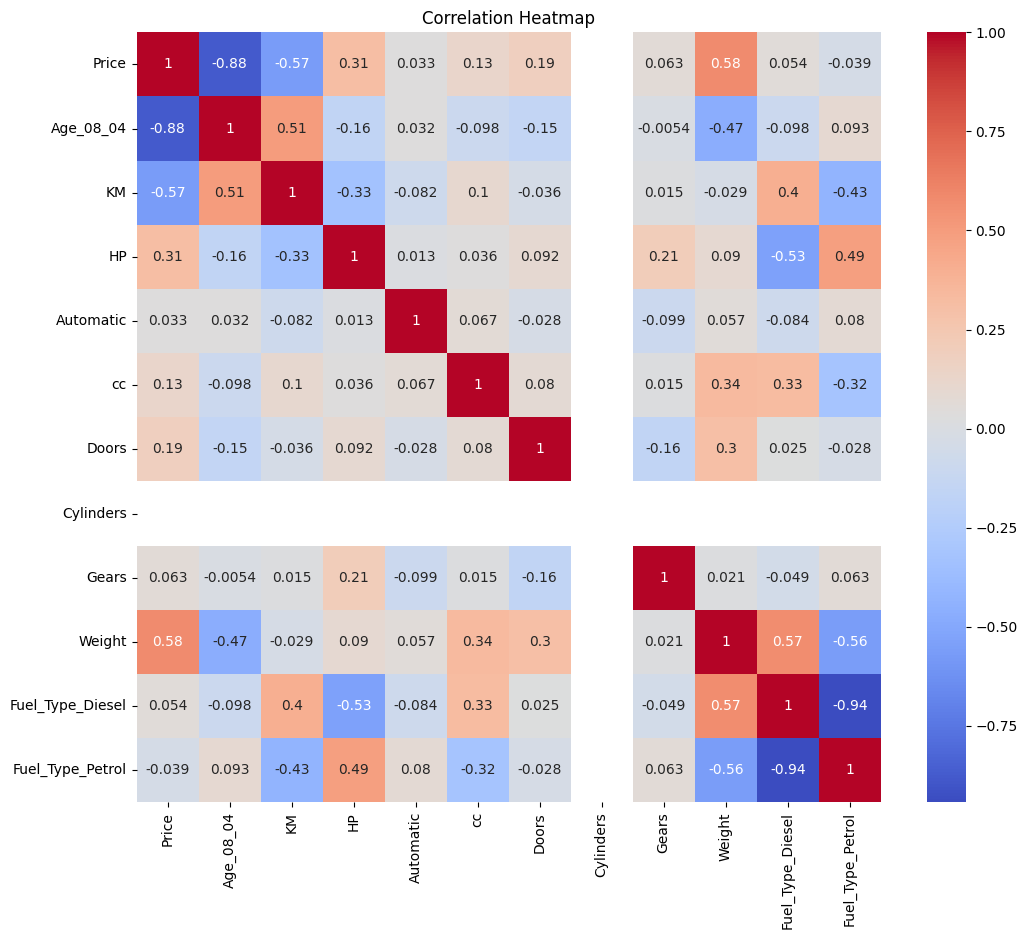

In [12]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


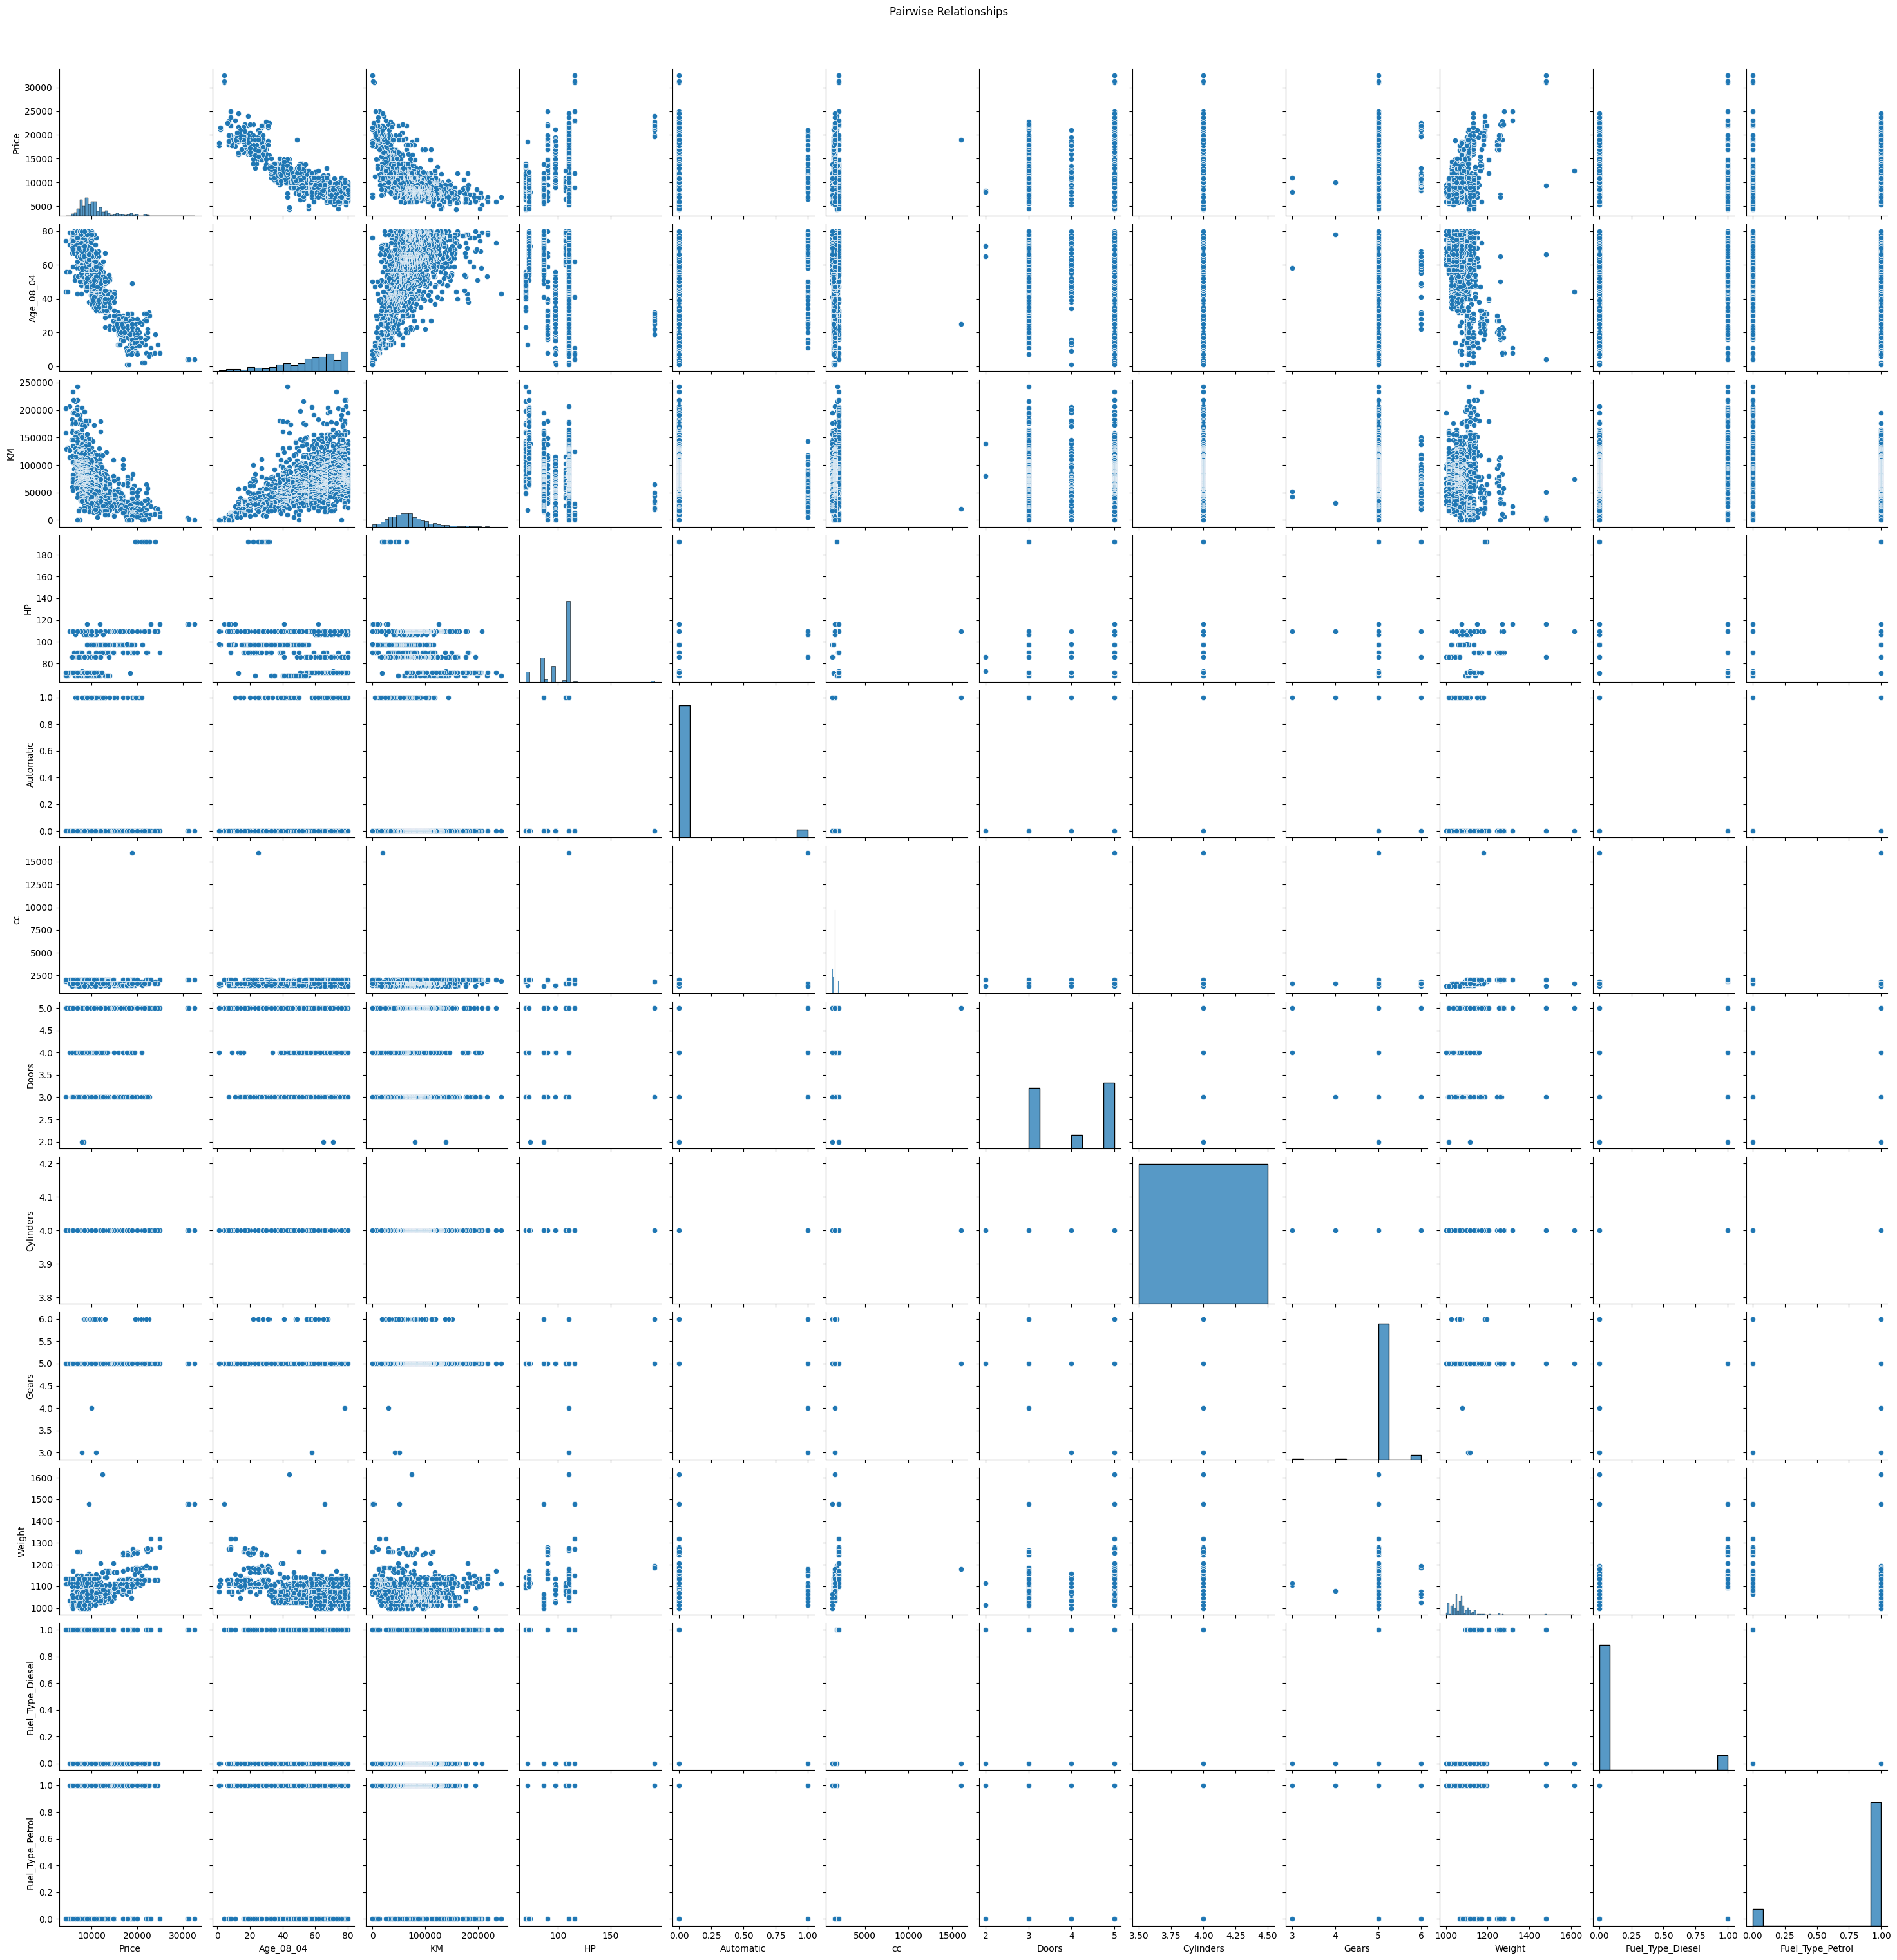

In [13]:
# Pairwise relationships
sns.pairplot(df)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


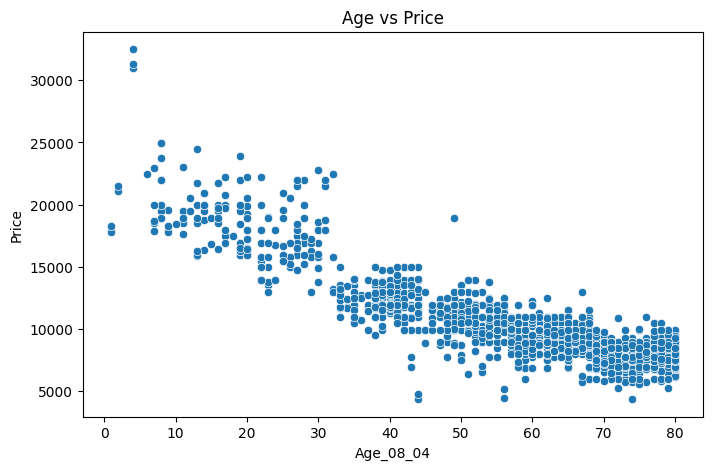

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age_08_04', y='Price', data=df)
plt.title("Age vs Price")
plt.show()


In [15]:
md = smf.ols("Price ~ Doors", data=df).fit()
print(md.summary())
print(md.pvalues)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Sat, 24 May 2025   Prob (F-statistic):           1.46e-12
Time:                        11:20:11   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.0

In [16]:
mc = smf.ols("Price ~ cc", data=df).fit()
print(mc.summary())
print(mc.pvalues)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sat, 24 May 2025   Prob (F-statistic):           1.55e-06
Time:                        11:20:22   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.0

In [17]:
mcd = smf.ols("Price ~ cc + Doors", data=df).fit()
print(mcd.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Sat, 24 May 2025   Prob (F-statistic):           1.15e-15
Time:                        11:20:36   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.0

In [18]:
# Define features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Select numeric data only
X_numeric = X.select_dtypes(include=[np.number])

# Add constant for VIF
X_const = sm.add_constant(X_numeric)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print("Variance Inflation Factors (VIF):")
print(vif_data)


Variance Inflation Factors (VIF):
     Feature          VIF
0  Age_08_04     1.909676
1         KM     1.679142
2         HP     1.218066
3  Automatic     1.047677
4         cc     1.150898
5      Doors     1.155484
6  Cylinders  1378.328904
7      Gears     1.109188
8     Weight     1.664910


In [19]:
# Feature matrix and target vector
X = df.drop('Price', axis=1)
y = df['Price']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (1148, 11)
Testing data shape: (288, 11)


In [20]:
# Model 1: All features
lr_model1 = LinearRegression()
lr_model1.fit(X_train, y_train)

# Coefficients
coefficients = pd.Series(lr_model1.coef_, index=X.columns)
print("Model 1 Coefficients:\n", coefficients)


Model 1 Coefficients:
 Age_08_04          -1.208305e+02
KM                 -1.623141e-02
HP                  1.403948e+01
Automatic           1.488309e+02
cc                 -3.037219e-02
Doors              -6.031097e+01
Cylinders          -1.620037e-12
Gears               5.516007e+02
Weight              2.588496e+01
Fuel_Type_Diesel   -6.854876e+01
Fuel_Type_Petrol    1.370809e+03
dtype: float64


In [21]:
selected_features2 = ['Age_08_04', 'KM', 'Weight', 'HP']
lr_model2 = LinearRegression()
lr_model2.fit(X_train[selected_features2], y_train)

# Coefficients
coefficients2 = pd.Series(lr_model2.coef_, index=selected_features2)
print("Model 2 Coefficients:\n", coefficients2)


Model 2 Coefficients:
 Age_08_04   -120.025405
KM            -0.020233
Weight        19.769066
HP            29.052170
dtype: float64


In [22]:
# Optional: manually pick features with VIF < 5 from previous output
selected_features3 = ['Age_08_04', 'KM', 'HP', 'Weight', 'Fuel_Type_Diesel']
lr_model3 = LinearRegression()
lr_model3.fit(X_train[selected_features3], y_train)

# Coefficients
coefficients3 = pd.Series(lr_model3.coef_, index=selected_features3)
print("Model 3 Coefficients:\n", coefficients3)


Model 3 Coefficients:
 Age_08_04           -119.756208
KM                    -0.017813
HP                    16.584227
Weight                24.487586
Fuel_Type_Diesel   -1176.911908
dtype: float64


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_tst, y_tst, name):
    y_pred = model.predict(X_tst)
    mse = mean_squared_error(y_tst, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_tst, y_pred)
    print(f"{name} -> RMSE: {rmse:.2f}, R2: {r2:.4f}")

# Evaluate all three models
evaluate_model(lr_model1, X_test, y_test, "Model 1 (All Features)")
evaluate_model(lr_model2, X_test[selected_features2], y_test, "Model 2 (Selected Features)")
evaluate_model(lr_model3, X_test[selected_features3], y_test, "Model 3 (Low VIF Features)")


Model 1 (All Features) -> RMSE: 1484.27, R2: 0.8349
Model 2 (Selected Features) -> RMSE: 1411.85, R2: 0.8506
Model 3 (Low VIF Features) -> RMSE: 1474.41, R2: 0.8371


In [24]:
from sklearn.linear_model import Lasso, Ridge

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)
evaluate_model(lasso, X_test_scaled, y_test, "Lasso Regression")

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
evaluate_model(ridge, X_test_scaled, y_test, "Ridge Regression")


Lasso Regression -> RMSE: 1483.24, R2: 0.8351
Ridge Regression -> RMSE: 1483.56, R2: 0.8350
